# Project Title: Exploratory Analysis of Corporate Carbon Emissions Data

![Factory producing CO2 pollution](https://img.freepik.com/free-photo/factory-producing-co2-pollution_23-2150858301.jpg?t=st=1739946779~exp=1739950379~hmac=32eee80dca1442e017c2829bfd1f84c07906573a4bc5c0b8759b0e4242e1e6b5&w=1380)
(Photo source : https://img.freepik.com/free-photo/factory-producing-co2-pollution_23-2150858301.jpg)
**Introduction : Carbon footprint analysis is a vital tool for assessing the environmental impact of products, organizations, and activities.**

As global concerns about climate change continue to grow, understanding and mitigating carbon emissions has become a critical priority for businesses worldwide. This project aims to explore and analyze a dataset containing carbon emissions data from various companies across industries. By examining key metrics such as carbon intensity, lifecycle emissions, and industry-specific trends, this analysis seeks to uncover patterns and insights that can inform sustainability strategies.

This project employs carbon footprinting techniques to analyze the Carbon Catalogue dataset, which comprises detailed product carbon footprint (PCF) data from 145 companies across multiple industries. The objective is to provide actionable insights to help companies identify high-impact areas for reducing emissions and advancing their sustainability goals.

The primary goals are to:

1. Quantify carbon intensity variations across different sectors  
2. Determine the distribution of emissions across product lifecycle stages  
3. Provide data-driven recommendations for emissions reduction.


When factoring heat generation required for the manufacturing and transportation of products, _Greenhouse gas emissions attributable to products, from food to sneakers to appliances, make up more than 75% of global emissions._ (`Source: The Carbon Catalogue https://www.nature.com/articles/s41597-022-01178-9`)

Our data, which is publicly available on https://springernature.figshare.com/, contains product carbon footprints (PCFs) for various companies. PCFs are the greenhouse gas emissions attributable to a given product, measured in CO<sub>2</sub> (carbon dioxide equivalent).
<!--https://www.nature.com/articles/s41597-022-01178-9-->

Source : https://springernature.figshare.com/articles/dataset/The_Carbon_Catalogue_public_database_Carbon_footprints_of_866_commercial_products_across_8_industry_sectors_and_5_continents/16908979?file=31271269

We will use this data to examine the carbon footprint of each industry in the dataset! 

**Extract the raw data from the URL**

The Carbon Catalogue dataset is extracted from springernature.com

Source : https://springernature.figshare.com/articles/dataset/The_Carbon_Catalogue_public_database_Carbon_footprints_of_866_commercial_products_across_8_industry_sectors_and_5_continents/16908979?file=31271269

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Download the raw product_emissions data from figshare.com

import requests

# URL of the file
url = 'https://springernature.figshare.com/ndownloader/files/31271269'

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write-binary mode and save the content
    with open(r'C:\Users\zacle\Desktop\Serene\Project\Datacamp\analysing carbon emissions\product_emissions_rawdata.xlsx', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully!")
else:
    print(f"Failed to retrieve the file. HTTP Status code: {response.status_code}")

File downloaded successfully!


In [7]:
# Load the raw data into a dataframe and call it df_emissions
import pandas as pd

# Assuming the Excel file was successfully downloaded, now load it into a DataFrame
df_emissions = pd.read_excel(r'C:\Users\zacle\Desktop\Serene\Project\Datacamp\analysing carbon emissions\product_emissions_rawdata.xlsx')

# Create a clean copy of the dataframe to preserve data
df_clean_emissions = df_emissions.copy()

# Print confirmation message
print("Dataframe has been copied successfully!")

Dataframe has been copied successfully!


**Transform Raw Data** : Clean and prepare the data for analysis.
1. Rename and Standardize Columns
2. Change Data Types
3. Remove Duplicates
4. Handle Missing Values

**1. Rename and Standardize Columns**

In [11]:
# Rename columns using PEP8 best practices 
# 1. remove spaces 2. convert to lowercase in snake_case for best practices 3. remove special characters 

import re

def rename_columns(col_name):
    col_name = col_name.strip()  # Remove leading/trailing spaces
    col_name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', col_name)  # Convert camelCase/PascalCase to snake_case
    col_name = re.sub(r'\s+', '_', col_name)  # Replace spaces with underscores
    col_name = re.sub(r'[-]', '_', col_name)  # Replace hyphens with underscores
    col_name = re.sub(r"[^\w\s]", '', col_name)  # Remove other special characters (*, ', (), etc.)
    col_name = col_name.lower()  # Convert to lowercase
    return col_name

# Apply function to all DataFrame column names
df_clean_emissions.columns = [rename_columns(col) for col in df_clean_emissions.columns]

# Display cleaned column names
print(df_clean_emissions.columns)

Index(['pcf_id', 'year_of_reporting', 'stage_level_co2e_available',
       'product_name_and_functional_unit', 'product_detail', 'company',
       'country_where_company_is_incorporated', 'companys_gics_industry_group',
       'companys_gics_industry', 'companys_sector', 'product_weight_kg',
       'source_for_product_weight', 'products_carbon_footprint_pcf_kg_co2e',
       'carbon_intensity', 'protocol_used_for_pcf',
       'relative_change_in_pcf_vs_previous',
       'company_reported_reason_for_change', 'change_reason_category',
       'upstream_estimated_from_operations',
       'upstream_co2e_fraction_of_total_pcf',
       'operations_co2e_fraction_of_total_pcf',
       'downstream_co2e_fraction_of_total_pcf',
       'transport_co2e_fraction_of_total_pcf',
       'end_of_life_co2e_fraction_of_total_pcf',
       'adjustments_to_raw_data_if_any'],
      dtype='object')


**2. Remove Duplicates** : Looks like pcf_id is a unique identifier

In [14]:
# Count unique 'pcf_id' values
unique_ids = df_clean_emissions['pcf_id'].nunique()

# Count total number of rows
total_rows = len(df_clean_emissions)

# Display the results
print(f"Unique game_ids: {unique_ids}")
print(f"Total rows: {total_rows}")
print(f"There are {total_rows - unique_ids} rows with duplicates.")

Unique game_ids: 866
Total rows: 866
There are 0 rows with duplicates.


**3. Handle Missing Values** : a. Identify rows with null values b. Fill/Delete rows with null values

In [17]:
#Identify columns with null values
# Perform a null value check
print("There are the following null values in the df_emissions dataset:")

# Check if there are any null values
null_values = df_clean_emissions.isnull().sum()

# If there are null values, print the count of nulls
if null_values.any():
    print(null_values)
else:
    print("There are no null values in the dataset.")

#Inspect the rows with null values
df_clean_emissions[df_clean_emissions.isnull().any(axis=1)]

# Fill nulls with a default value
df_clean_emissions.fillna(0, inplace=True)

# Confirm that the null values have been filled
print("\nNull values have been successfully filled with 0.")

There are the following null values in the df_emissions dataset:
pcf_id                                      0
year_of_reporting                           0
stage_level_co2e_available                  0
product_name_and_functional_unit            0
product_detail                             10
company                                     0
country_where_company_is_incorporated       0
companys_gics_industry_group                0
companys_gics_industry                      0
companys_sector                             0
product_weight_kg                           0
source_for_product_weight                   0
products_carbon_footprint_pcf_kg_co2e       0
carbon_intensity                            0
protocol_used_for_pcf                       0
relative_change_in_pcf_vs_previous          0
company_reported_reason_for_change          0
change_reason_category                      0
upstream_estimated_from_operations          0
upstream_co2e_fraction_of_total_pcf         0
operations_co2e

In [19]:
# Perform a null value check
print("There are the following null values in the df_emissions dataset:")

# Check if there are any null values
null_values = df_clean_emissions.isnull().sum()

# If there are null values, print the count of nulls
if null_values.any():
    print(null_values)
else:
    print("There are no null values in the dataset.")

There are the following null values in the df_emissions dataset:
There are no null values in the dataset.


**4. Change Data Types** 

In [22]:
# Check and print original data types before conversion
print("Original data types before conversion:")
df_clean_emissions.dtypes

Original data types before conversion:


pcf_id                                     object
year_of_reporting                           int64
stage_level_co2e_available                 object
product_name_and_functional_unit           object
product_detail                             object
company                                    object
country_where_company_is_incorporated      object
companys_gics_industry_group               object
companys_gics_industry                     object
companys_sector                            object
product_weight_kg                         float64
source_for_product_weight                  object
products_carbon_footprint_pcf_kg_co2e     float64
carbon_intensity                          float64
protocol_used_for_pcf                      object
relative_change_in_pcf_vs_previous         object
company_reported_reason_for_change         object
change_reason_category                     object
upstream_estimated_from_operations         object
upstream_co2e_fraction_of_total_pcf        object


In [24]:
# Convert columns to numeric and round to 2 decimal places

# 'upstream_co2e_fraction_of_total_pcf' - convert to float and round
original_dtype = df_clean_emissions['upstream_co2e_fraction_of_total_pcf'].dtype
df_clean_emissions['upstream_co2e_fraction_of_total_pcf'] = pd.to_numeric(df_clean_emissions['upstream_co2e_fraction_of_total_pcf'], errors='coerce').fillna(0).round(2)
new_dtype = df_clean_emissions['upstream_co2e_fraction_of_total_pcf'].dtype
print(f"Column 'upstream_co2e_fraction_of_total_pcf' changed from {original_dtype} to {new_dtype} and rounded to 2 decimal places.")

# 'operations_co2e_fraction_of_total_pcf' - convert to float and round
original_dtype = df_clean_emissions['operations_co2e_fraction_of_total_pcf'].dtype
df_clean_emissions['operations_co2e_fraction_of_total_pcf'] = pd.to_numeric(df_clean_emissions['operations_co2e_fraction_of_total_pcf'], errors='coerce').fillna(0).round(2)
new_dtype = df_clean_emissions['operations_co2e_fraction_of_total_pcf'].dtype
print(f"Column 'operations_co2e_fraction_of_total_pcf' changed from {original_dtype} to {new_dtype} and rounded to 2 decimal places.")

# 'downstream_co2e_fraction_of_total_pcf' - convert to float and round
original_dtype = df_clean_emissions['downstream_co2e_fraction_of_total_pcf'].dtype
df_clean_emissions['downstream_co2e_fraction_of_total_pcf'] = pd.to_numeric(df_clean_emissions['downstream_co2e_fraction_of_total_pcf'], errors='coerce').fillna(0).round(2)
new_dtype = df_clean_emissions['downstream_co2e_fraction_of_total_pcf'].dtype
print(f"Column 'downstream_co2e_fraction_of_total_pcf' changed from {original_dtype} to {new_dtype} and rounded to 2 decimal places.")

# 'transport_co2e_fraction_of_total_pcf' - convert to float and round
original_dtype = df_clean_emissions['transport_co2e_fraction_of_total_pcf'].dtype
df_clean_emissions['transport_co2e_fraction_of_total_pcf'] = pd.to_numeric(df_clean_emissions['transport_co2e_fraction_of_total_pcf'], errors='coerce').fillna(0).round(2)
new_dtype = df_clean_emissions['transport_co2e_fraction_of_total_pcf'].dtype
print(f"Column 'transport_co2e_fraction_of_total_pcf' changed from {original_dtype} to {new_dtype} and rounded to 2 decimal places.")

# 'end_of_life_co2e_fraction_of_total_pcf' - convert to float and round
original_dtype = df_clean_emissions['end_of_life_co2e_fraction_of_total_pcf'].dtype
df_clean_emissions['end_of_life_co2e_fraction_of_total_pcf'] = pd.to_numeric(df_clean_emissions['end_of_life_co2e_fraction_of_total_pcf'], errors='coerce').fillna(0).round(2)
new_dtype = df_clean_emissions['end_of_life_co2e_fraction_of_total_pcf'].dtype
print(f"Column 'end_of_life_co2e_fraction_of_total_pcf' changed from {original_dtype} to {new_dtype} and rounded to 2 decimal places.")

# Convert 'stage_level_co2e_available' to boolean (no rounding needed)
original_dtype = df_clean_emissions['stage_level_co2e_available'].dtype
df_clean_emissions['stage_level_co2e_available'] = df_clean_emissions['stage_level_co2e_available'].map({'Yes': True, 'No': False})
new_dtype = df_clean_emissions['stage_level_co2e_available'].dtype
print(f"Column 'stage_level_co2e_available' changed from {original_dtype} to {new_dtype}")

# Display the cleaned DataFrame info
df_clean_emissions.info()

Column 'upstream_co2e_fraction_of_total_pcf' changed from object to float64 and rounded to 2 decimal places.
Column 'operations_co2e_fraction_of_total_pcf' changed from object to float64 and rounded to 2 decimal places.
Column 'downstream_co2e_fraction_of_total_pcf' changed from object to float64 and rounded to 2 decimal places.
Column 'transport_co2e_fraction_of_total_pcf' changed from object to float64 and rounded to 2 decimal places.
Column 'end_of_life_co2e_fraction_of_total_pcf' changed from object to float64 and rounded to 2 decimal places.
Column 'stage_level_co2e_available' changed from object to bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pcf_id                                  866 non-null    object 
 1   year_of_reporting                       866 non-null    int64  
 2

**Checkpoint** : Save the cleaned df_clean_emissions as a .xlsx

In [ ]:
#save file locally
df_clean_emissions.to_excel(r'C:\Users\zacle\Desktop\Serene\Project\Datacamp\analysing carbon emissions\product_emissions_cleandata.xlsx', index=False)

# Data Analysis using pandas, matplotlib and seaborn

In [38]:
# Identify the years where the data is collected 
print("Using the product_emissions table, we are to find the number of unique companies and their total carbon footprint PCF for each industry group.")

# Determine the unique reporting years and their count
unique_years = df_clean_emissions['year_of_reporting'].unique()
num_years = df_clean_emissions['year_of_reporting'].nunique()

print(f"This project is based on {num_years} years of reporting data: {sorted(unique_years)}")

Using the product_emissions table, we are to find the number of unique companies and their total carbon footprint PCF for each industry group.
This project is based on 5 years of reporting data: [2013, 2014, 2015, 2016, 2017]


**Analysis Statement : To explore how carbon intensity (measured as kg CO2e per kg of product) varies across different GICS Industry Groups based on 5 years of reporting data.**

Goal : This helps us identify which industries are more carbon-intensive and may require focused sustainability initiatives.

Insights : To help identify the industry that are more carbon-intensive, providing guidance for sustainability interventions.

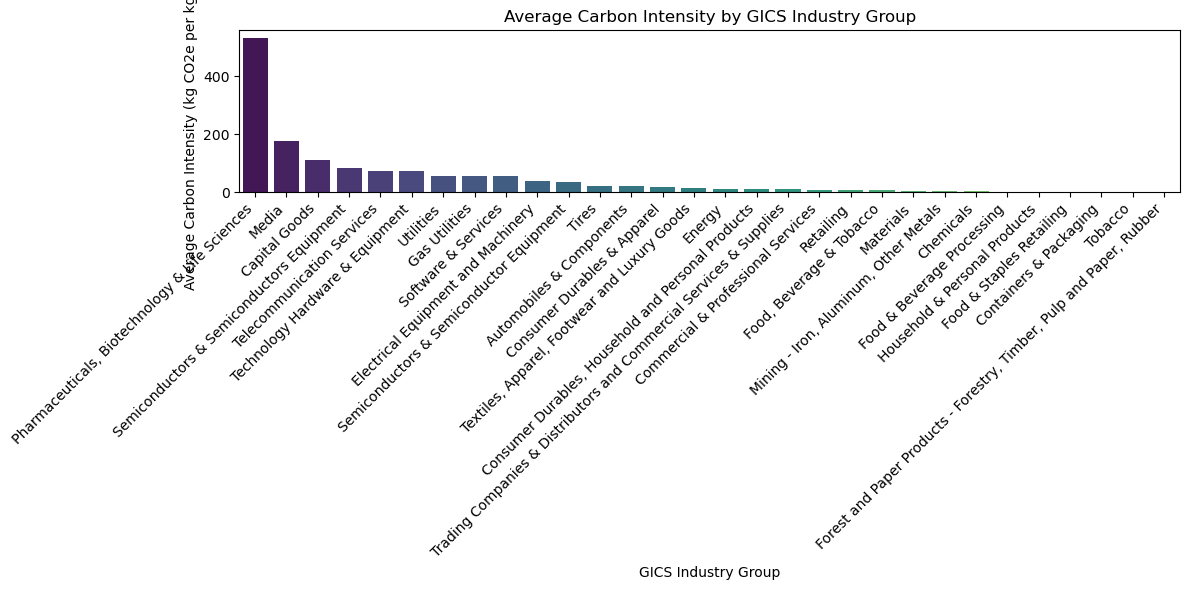

In [41]:
# This query groups the data by companys_gics_industry_group and calculates the average carbon intensity, sorting the results in descending order.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_clean_emissions

# Grouping by GICS Industry Group
industry_group = df.groupby('companys_gics_industry_group')['carbon_intensity'].mean().reset_index()
industry_group = industry_group.sort_values(by='carbon_intensity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='companys_gics_industry_group', 
    y='carbon_intensity', 
    hue='companys_gics_industry_group',  # Assign hue as the x variable
    data=industry_group, 
    palette="viridis",
    legend=False  # Disable the legend
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Carbon Intensity by GICS Industry Group")
plt.xlabel("GICS Industry Group")
plt.ylabel("Average Carbon Intensity (kg CO2e per kg product)")
plt.tight_layout()
plt.show()

**Analysis Results : Three GICS Industry Groups with the highest average carbon intensity are**: 

- **Pharmaceuticals, Biotechnology & Life Sciences: 532.81 kg CO₂e/kg (Highest)**
- **Media: 175.10 kg CO₂e/kg**
- **Capital Goods: 112.10 kg CO₂e/kg**

Key Observations:
Pharmaceutical Industry : This sector’s high carbon intensity may stem from energy-intensive manufacturing processes, raw material extraction, and regulatory requirements that necessitate strict environmental controls.

Media Industry : Although traditionally not seen as carbon-intensive, the media sector includes printing, broadcasting, and digital infrastructure (such as data centers), which contribute significantly to carbon emissions.

Capital Goods Industry: This category includes industrial machinery, electrical equipment, and construction materials, which require substantial amounts of energy and raw materials for production, leading to high carbon intensity.

The pharmaceutical industry has a high carbon intensity, averaging 532 kg CO₂e per kg of product. This places it among the most carbon-intensive sectors, primarily due to:
- Energy-Intensive Manufacturing : Drug production involves complex chemical processes, high-temperature reactions, and stringent sterilization requirements, all of which consume significant energy.
- Global Supply Chains : Many raw materials and active pharmaceutical ingredients (APIs) are sourced from different countries, leading to high emissions from transportation and logistics.
- Waste & Chemical Use : The sector relies on solvent-heavy processes and generates substantial chemical waste, contributing to its carbon footprint.
- Regulatory & Quality Standards : Strict industry regulations demand high levels of precision and reliability, often leading to redundant production steps and increased energy use.

Potential Strategies to Reduce Carbon Impact
- Adopt Green Chemistry : Use eco-friendly chemical synthesis methods to reduce solvent waste and lower energy consumption.
- Switch to Renewable Energy : Power manufacturing facilities with wind, solar, or other renewable sources.
- Optimize Supply Chains : Reduce transportation emissions by sourcing raw materials closer to production facilities.
- Improve Energy Efficiency : Upgrade to energy-efficient equipment and implement AI-driven process optimization.
- Sustainable Packaging : Reduce plastic usage and switch to biodegradable or recyclable packaging materials.

For example: Pharmaceutical Industry : AstraZeneca 
Net Zero by 2030: AstraZeneca has committed to reaching carbon neutrality in its operations by 2025 and achieving net zero across its supply chain by 2030.

Green Manufacturing: The company has implemented energy-efficient manufacturing processes, reducing emissions from its production facilities.
Sustainable R&D: They focus on green chemistry to design eco-friendly drugs that minimize waste and energy use.

**Analysis Results : Three GICS Industry Group with the lowest average carbon intensity are :** 

- **Containers & Packaging: 1.27 kg CO₂e/kg**
- **Food & Staples Retailing: 1.30 kg CO₂e/kg**
- **Food & Beverage Processing: 1.78 kg CO₂e/kg**

Key Observations : 
Tobacco Industry: Despite potential concerns over health and social impacts, the tobacco industry shows relatively low carbon intensity per kg of product. This might be due to its simplier manufacturing process or the nature of its raw materials.

Container Packaging Industry:The container packaging sector, which includes companies involved in the production of packaging materials, is also among the lowest in terms of carbon emissions per unit weight. This suggests efficiency in production and material usage, which could be a benchmark for other sector.
                                                                                                                                                                                                                                                                                               
Paper Inudstry : The paper industry’s lower carbon intensity might reflect established processes and improvements in production technology that minimize energy usage and emissions.

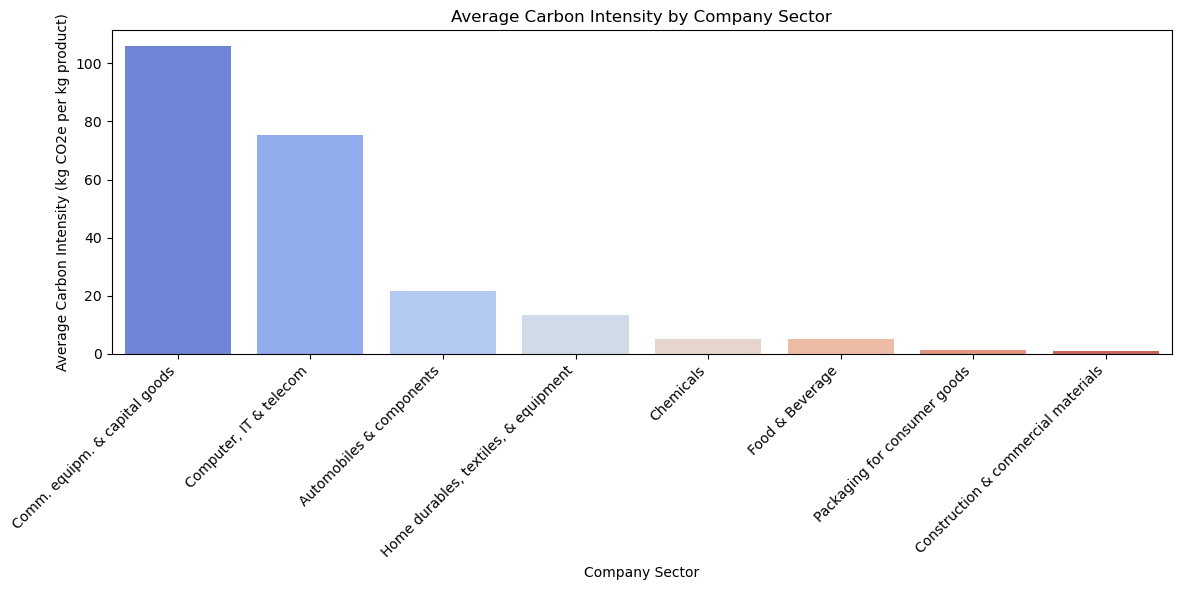

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_clean_emissions

# Grouping by Sector
sector_group = df.groupby('companys_sector')['carbon_intensity'].mean().reset_index()
sector_group = sector_group.sort_values(by='carbon_intensity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='companys_sector', 
    y='carbon_intensity', 
    hue='companys_sector',  # Assign hue as the x variable
    data=sector_group, 
    palette="coolwarm",
    legend=False  # Disable the legend
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Carbon Intensity by Company Sector")
plt.xlabel("Company Sector")
plt.ylabel("Average Carbon Intensity (kg CO2e per kg product)")
plt.tight_layout()
plt.show()

**Analysis Results 1: The top three most carbon-intensive sectors are: Communication Equipment, Computer & IT and Automobiles**

Key Observations:
Communication Equipment: This sector includes the manufacturing of telecommunications devices, networking hardware, and related infrastructure. The high carbon intensity may stem from energy-intensive semiconductor production, raw material extraction, and global supply chains.

Computer & IT: The production of computers, servers, and IT hardware contributes significantly to carbon emissions, driven by complex manufacturing processes, rare earth material extraction, and power consumption in data centers.

Automobiles: The automotive industry is a well-known contributor to carbon emissions due to metal processing, assembly line operations, and emissions from supply chains involved in producing cars and their components.

Sustainability Initiatives: 
- These industries could benefit from renewable energy integration, energy-efficient manufacturing, and sustainable material sourcing.
- Comparing high-carbon industries with low-carbon sectors (e.g., Tobacco, Packaging, and Paper) may reveal best practices for reducing emissions.
- Governments and corporations should explore carbon-neutral technologies, circular economy approaches, and process optimizations to drive sustainability.
  
This analysis highlights key carbon-intensive industries that should be prioritized for emission reduction efforts and sustainability interventions. 

**Analysis Results 2 : Lowest three carbon-intensive sectors are : Food & Beverage, Consumer Goods Packaging and Construction Materials**

Key Observations :

Food & Beverage: This sector exhibits lower carbon intensity, possibly due to the nature of food processing and distribution where energy use is relatively optimized, or because emissions are spread across a large volume of products.

Packaging for Consumer Goods: The packaging sector, while dealing with materials like plastics, glass, or metals, shows lower average carbon intensity. This may be attributed to efficiencies in production processes or the reuse and recycling of packaging materials, which help reduce overall emissions.

Construction & Commercial Materials: Industries in construction and commercial materials benefit from economies of scale and optimized production techniques. The use of standardized materials and advances in manufacturing technology likely contribute to their lower carbon intensity.

In [56]:
# General Average Statistics
industry_summary = df.groupby('companys_gics_industry_group')['carbon_intensity'].describe()
print(industry_summary)

                                                    count        mean  \
companys_gics_industry_group                                            
Automobiles & Components                             73.0   21.590137   
Capital Goods                                        33.0  112.099091   
Chemicals                                            29.0    2.295517   
Commercial & Professional Services                   42.0    7.940000   
Consumer Durables & Apparel                          52.0   18.405962   
Consumer Durables, Household and Personal Products    8.0   11.728750   
Containers & Packaging                                8.0    1.265000   
Electrical Equipment and Machinery                   11.0   36.950909   
Energy                                                5.0   12.116000   
Food & Beverage Processing                           13.0    1.780769   
Food & Staples Retailing                             24.0    1.303333   
Food, Beverage & Tobacco                           

**Analysis Statement : To analyze the distribution of emissions across the product lifecycle stages (upstream, operations, downstream, transport, and end-of-life) for products where stage-level CO₂e data is available.**

With a focus on three GICS Industry Groups with the highest average carbon intensity :
- Pharmaceuticals, Biotechnology & Life Sciences: 532.81 kg CO₂e/kg (Highest)
- Media: 175.10 kg CO₂e/kg
- Capital Goods: 112.10 kg CO₂e/kg

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_clean_emissions.copy()

# Dataset to include only rows with Stage-level CO2e available
df_stage = df[df['stage_level_co2e_available'] == True]

# Focus on three industries groups : 
selected_industries = ['Pharmaceuticals, Biotechnology & Life Sciences', 'Media', 'Capital Goods']
df_selected = df_stage[df_stage['companys_gics_industry_group'].isin(selected_industries)]

# Calculate the average percentage contribution of each lifecycle stage for each industry using the following columns : 
# 'upstream_co2e_fraction_of_total_pcf', 'operations_co2e_fraction_of_total_pcf',
# 'downstream_co2e_fraction_of_total_pcf', 'transport_co2e_fraction_of_total_pcf',
# 'end_of_life_co2e_fraction_of_total_pcf'

lifecycle_stages = [
    'upstream_co2e_fraction_of_total_pcf',
    'operations_co2e_fraction_of_total_pcf',
    'downstream_co2e_fraction_of_total_pcf',
    'transport_co2e_fraction_of_total_pcf',
    'end_of_life_co2e_fraction_of_total_pcf'
]

# Group by industry and calculate mean for each stage
avg_emissions = df_selected.groupby('companys_gics_industry_group')[lifecycle_stages].mean().reset_index()

# Optional: Multiply by 100 if values are in fraction (e.g., 0.3 for 30%)
avg_emissions[lifecycle_stages] = avg_emissions[lifecycle_stages] * 100

print("List of average emissions : \n", avg_emissions)

List of average emissions : 
                      companys_gics_industry_group  \
0                                   Capital Goods   
1                                           Media   
2  Pharmaceuticals, Biotechnology & Life Sciences   

   upstream_co2e_fraction_of_total_pcf  operations_co2e_fraction_of_total_pcf  \
0                            40.846154                               8.961538   
1                            45.733333                               5.733333   
2                             2.666667                               0.666667   

   downstream_co2e_fraction_of_total_pcf  \
0                              50.230769   
1                              48.533333   
2                              96.333333   

   transport_co2e_fraction_of_total_pcf  \
0                              1.500000   
1                              1.666667   
2                              5.000000   

   end_of_life_co2e_fraction_of_total_pcf  
0                                2.884

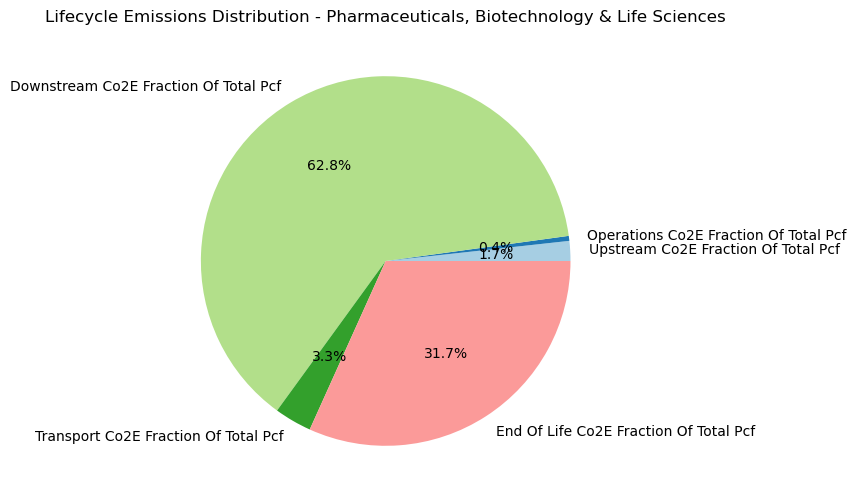

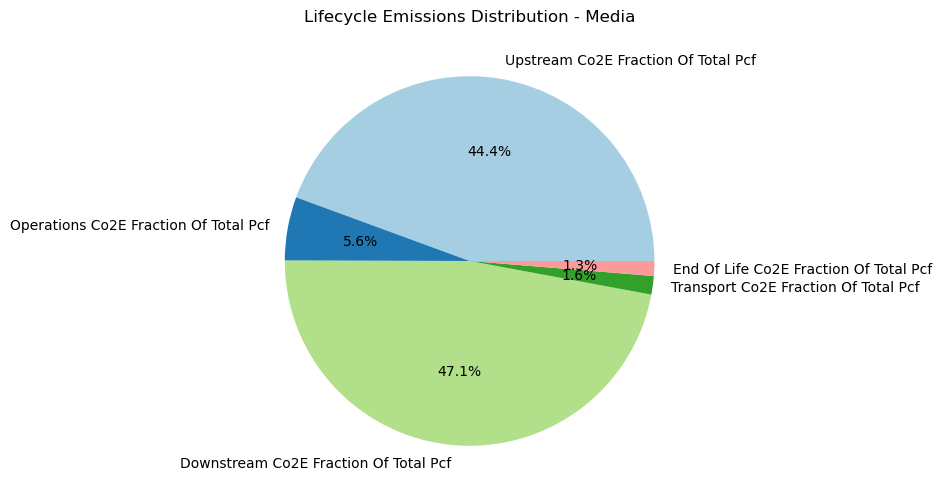

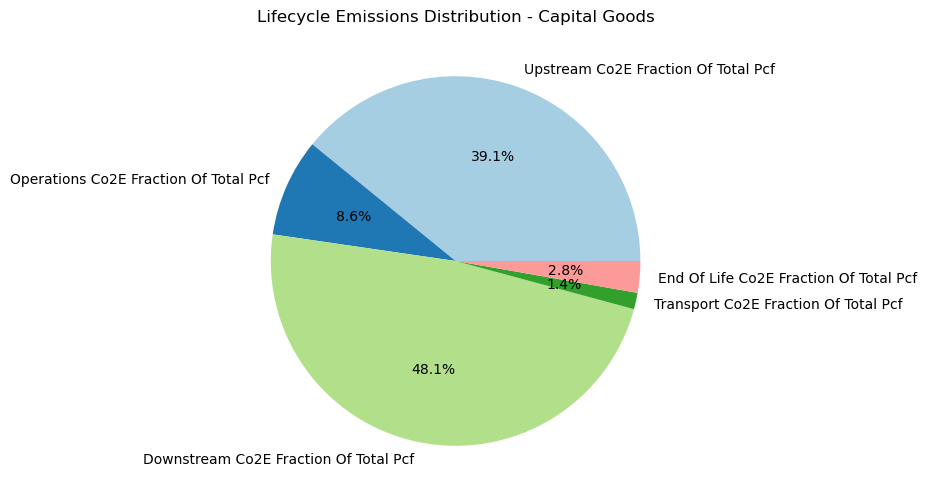

In [66]:
# Pie chart for each industry (example for Pharmaceuticals)

colors = plt.cm.Paired.colors  # Using a predefined colormap for better visualization

for industry in selected_industries:
    data = avg_emissions[avg_emissions['companys_gics_industry_group'] == industry]
    if not data.empty:
        labels = [stage.replace('_', ' ').title() for stage in lifecycle_stages]
        sizes = data[lifecycle_stages].values.flatten()
        plt.figure(figsize=(6,6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
        plt.title(f"Lifecycle Emissions Distribution - {industry}")
        plt.show()

**Analysis Results for Pharmaceuticals: To analyze the distribution of emissions across the product lifecycle stages (upstream, operations, downstream, transport, and end-of-life) for products where stage-level CO₂e data is available.** 

Downstream (62.8%):
The largest share of emissions comes from the downstream stage. This suggests that activities related to the use of the product, distribution, or even its eventual disposal generate the bulk of the carbon footprint. It indicates a strong opportunity to reduce emissions by optimizing post-production processes, such as improving distribution logistics, encouraging sustainable product usage, or developing strategies for more eco-friendly disposal or recycling.

End-of-Life (31.7%):
End-of-life emissions are also substantial, meaning that the waste management and disposal phase of the product contributes significantly to the overall carbon footprint. This underscores the need for enhanced recycling, better waste management practices, and designing products for easier end-of-life processing.

Transport (3.3%):
The transport phase contributes a relatively small percentage. Although still important, it appears that improvements in logistics or switching to greener transportation methods might have a more limited impact compared to the downstream and end-of-life stages.

Upstream (1.7%):
Emissions in the upstream stage are minimal, indicating that the raw material extraction and processing parts of the supply chain are not major contributors in this context. This might suggest that the sourcing of materials is relatively efficient in terms of carbon emissions or that the processes involved are less energy-intensive.

Operations (0.4%):
The operations stage, which includes manufacturing and direct production activities, contributes very little to the overall emissions. This could indicate that the production processes have already been optimized for energy efficiency or that the energy use in these processes is not a significant driver of emissions relative to the other stages.

Implications for Reducing Carbon Impact in Pharmaceuticals
- Focus on Downstream Activities: Since downstream processes account for 62% of emissions, optimizing these—such as streamlining distribution channels, reducing energy use in product use, or improving customer behavior towards sustainable usage—could yield significant carbon savings.

- Enhance End-of-Life Management: With 31% of emissions coming from end-of-life processes, strategies like better recycling programs, designing products for easier recycling, or investing in waste-to-energy solutions could be very impactful.

- Maintain Efficiency in Operations & Upstream: Even though upstream (1.7%) and operations (0.4%) contribute little to the total, continuous monitoring and incremental improvements in these areas will ensure that these contributions remain minimal as overall production scales up.

- Leverage Green Logistics for Transport: Although transport emissions are low (3.3%), further optimizing logistics (e.g., using electric vehicles or optimizing route planning) can still contribute to an overall sustainable supply chain.

**Analysis Results for Media : To analyze the distribution of emissions across the product lifecycle stages (upstream, operations, downstream, transport, and end-of-life) for products where stage-level CO₂e data is available.** 

Downstream (47.1%) : The largest contributor, meaning a significant portion of emissions happens after production (e.g., product use, distribution, or disposal).

Upstream (44.4%) : This percentage also quite high, suggesting that raw material extraction, processing, and supplier activities have a major impact.

Operations (5.6%) : Operations stage is relatively small, implying that manufacturing and facility energy use are not the biggest carbon drivers.

Transport (1.6%) : This is a small percentage meaning logistics plays a smaller roles in overall emissions. 

End of Life (1.3%) : This means disposal play a smaller role in overall emissions.

Implications for Reducing Carbon Impact in Media : 
- Downstream Activities : Streamline distribution channels and encourage energy-efficient media consumption.
- Upstream Activities : Use sustainable raw materials and collaborate with suppliers on energy efficiency.
- Operations : Improve energy efficiency in production facilities and integrate renewable energy.

**Analysis Results for Capital Goods : To analyze the distribution of emissions across the product lifecycle stages (upstream, operations, downstream, transport, and end-of-life) for products where stage-level CO₂e data is available.** 

Downstream (48.1%): A large share of emissions comes from product use, distribution, and disposal.

Upstream (39%): Significant emissions arise from raw material extraction, processing, and supplier activities.

Operations (8.6%): Manufacturing and facility energy use contribute to a moderate share of emissions.

End-of-Life (2%): Disposal and waste management have a relatively small impact on overall emissions.

Transport (1%): Logistics contribute minimally to the overall carbon footprint.

Implications for Reducing Carbon Impact in Capital Goods :
- Focus on Downstream Activities: Since downstream processes account for 62% of emissions, optimizing these—such as streamlining distribution channels, reducing energy use in product use, or improving customer behavior towards sustainable usage—could yield significant carbon savings.
- Energy-efficient product design : Source for raw materials locally or supplier collaboration or source for sustainable materials.
- Operations : Create machinery, tools, and equipment that consume less energy over their lifecycle.

**Analysis Statement : How do carbon footprints vary by product weight, and is there a correlation between product weight and carbon intensity?**

Objective: Investigate the relatiationship between Product weight (kg) and Product's carbon footprint (PCF, kg CO2e) or Carbon intensity

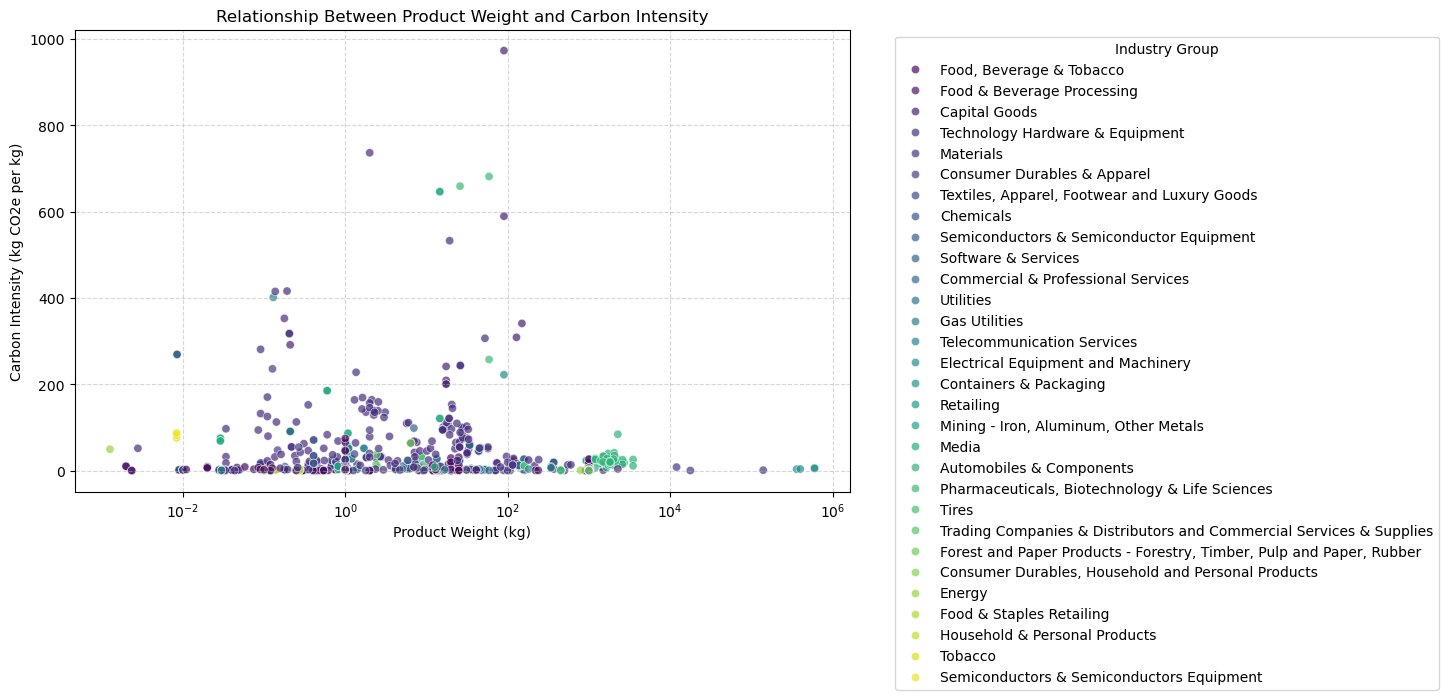

Pearson correlation: -0.03, p-value: 0.4168


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Scatter plot of product weight vs carbon intensity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['product_weight_kg'], 
    y=df['carbon_intensity'], 
    hue=df['companys_gics_industry_group'], 
    palette="viridis",
    alpha=0.7
)
plt.xscale('log')  # Log scale if large variation in product weight
plt.xlabel("Product Weight (kg)")
plt.ylabel("Carbon Intensity (kg CO2e per kg)")
plt.title("Relationship Between Product Weight and Carbon Intensity")
plt.legend(title="Industry Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(df['product_weight_kg'], df['carbon_intensity'])
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")


**Analysis Result**

A Pearson correlation of -0.03 suggests almost no relationship between product weight and carbon intensity. The p-value of 0.4168 indicates that this result is not statistically significant, meaning the observed correlation could be due to chance.

Interpretation
Since the correlation is close to zero, heavier products do not consistently have higher or lower carbon intensities.
Other factors, such as materials, manufacturing processes, energy sources, or lifecycle stages, may have a stronger influence on carbon footprints.
Industry differences could be masking trends. Some sectors may have a positive correlation while others have a negative or no correlation.

**Conclusion**:

This project provides an in-depth analysis of carbon intensity (kg CO₂e per kg of product) across different industries, with a specific focus on the top three GICS Industry Groups: Pharmaceuticals, Biotechnology & Life Sciences, Media, and Capital Goods. Our goal was to identify industries with higher carbon intensities and provide insights for targeted sustainability initiatives.

**Key Findings:**
Pharmaceuticals, Biotechnology & Life Sciences emerged as the highest carbon-intensive sector, with an average of 532.81 kg CO₂e/kg. This is primarily due to energy-intensive manufacturing processes, complex chemical reactions, and a global supply chain that contributes to transportation emissions. The end-of-life stage also contributes significantly to the carbon footprint, suggesting that there is a strong opportunity for improvement in waste management and recycling efforts.

Media came second with an average carbon intensity of 175.10 kg CO₂e/kg. While not typically recognized as a high-carbon sector, the media industry’s carbon intensity arises from infrastructure such as data centers, energy consumption in broadcasting, and the environmental impact of printed media.

Capital Goods had a lower but still substantial average carbon intensity of 112.10 kg CO₂e/kg. A significant portion of emissions comes from downstream activities (47.1%), followed closely by upstream emissions (44.4%), highlighting the importance of sustainable sourcing and optimizing product usage.

**Industry-Specific Implications for Carbon Emissions Reduction:**
Pharmaceuticals: Focus on optimizing downstream processes, improving waste management, and leveraging green chemistry can reduce emissions. Energy-efficient production techniques and renewable energy adoption in manufacturing will also have significant impacts.

Media: Investment in energy-efficient infrastructure for data centers, transitioning to renewable energy, and improving distribution logistics can contribute to reducing carbon intensity.

Capital Goods: Optimizing downstream processes, energy-efficient product design, and sourcing raw materials locally can lead to substantial reductions in carbon emissions.

**Analysis of Lifecycle Emissions:**
A detailed lifecycle analysis showed that downstream emissions were the largest contributor across all three industries, particularly in pharmaceuticals, where downstream accounted for 62.8% of emissions. This suggests that post-production stages such as product use, distribution, and disposal offer the greatest opportunities for carbon savings. Other key stages, including end-of-life and upstream activities, also present viable areas for targeted emissions reductions.

**Correlation Between Product Weight and Carbon Intensity**:
The analysis of the relationship between product weight and carbon intensity revealed a Pearson correlation of -0.03, which suggests almost no relationship between the two variables. The p-value of 0.4168 indicates that this result is not statistically significant. This suggests that product weight is not a reliable predictor of carbon intensity, and other factors such as materials, manufacturing processes, and industry-specific characteristics play a more significant role in determining carbon footprints.

**Final Thoughts:**
This analysis provides a comprehensive understanding of how carbon intensity varies across different industries, particularly in sectors with high carbon footprints like pharmaceuticals. Targeted interventions focusing on upstream and downstream activities, such as optimizing energy use, improving logistics, and adopting renewable energy sources, will be crucial in driving sustainability across industries.

For future work, focusing on industry-specific strategies and comparing the carbon intensity of various sectors could provide deeper insights into best practices for carbon reduction and sustainability efforts.